Eye Diseases Classification

Importing the Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import cv2
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import PIL
import os

C:\Users\VENKAT SARMA\AppData\Roaming\Python\Python36\site-packages\google\auth\crypt\_cryptography_rsa.py:22: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  import cryptography.exceptions
C:\Users\VENKAT SARMA\AppData\Roaming\Python\Python36\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
import os
folder_path = 'D:\final_project\final project\dataset'

glaucoma = Path(folder_path+'/glaucoma')
cataract = Path(folder_path+'/cataract')
normal = Path(folder_path+'/normal')
diabetic_retinopathy = Path(folder_path+'/diabetic_retinopathy')

In [3]:
from tqdm import tqdm
from pathlib import Path

disease_type = [
    Path(r'D:\final_project\final project\dataset\cataract'),
    Path(r'D:\final_project\final project\dataset\glaucoma'),
    Path(r'D:\final_project\final project\dataset\normal'),
    Path(r'D:\final_project\final project\dataset\diabetic_retinopathy')
]
df = pd.DataFrame()
 # build the dataframe
for types in disease_type:
    for imagepath in tqdm(list(types.iterdir()), desc= str(types)):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)],'disease_type': [disease_type.index(types)]})], ignore_index=True)

D:\final_project\final project\dataset\normal: 100%|██████████████████████████████| 1074/1074 [00:04<00:00, 235.95it/s]
D:\final_project\final project\dataset\diabetic_retinopathy: 100%|████████████████| 1098/1098 [00:04<00:00, 242.64it/s]


In [4]:
df

,image,disease_type
0,D:\final_project\final project\dataset\catarac...,0
1,D:\final_project\final project\dataset\catarac...,0
2,D:\final_project\final project\dataset\catarac...,0
3,D:\final_project\final project\dataset\catarac...,0
4,D:\final_project\final project\dataset\catarac...,0
...,...,...
4207,D:\final_project\final project\dataset\diabeti...,3
4208,D:\final_project\final project\dataset\diabeti...,3
4209,D:\final_project\final project\dataset\diabeti...,3
4210,D:\final_project\final project\dataset\diabeti...,3


In [5]:
df.disease_type.value_counts()

3    1098
2    1074
0    1033
1    1007
Name: disease_type, dtype: int64

Visualizing Images in dataset

In [6]:
def plot_image(n, num_samples=3):
    disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']

    plt.figure(figsize=(12, 12))

    for i, path in enumerate(images, 1):
        img = (plt.imread(path) - plt.imread(path).min()) / plt.imread(path).max()
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(disease_labels[n])

    plt.show()

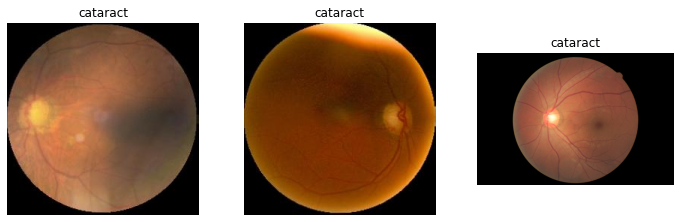

In [7]:
plot_image(1)

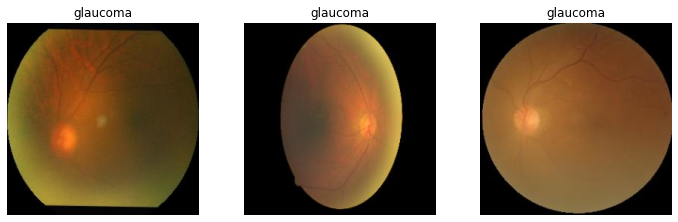

In [8]:
plot_image(0)

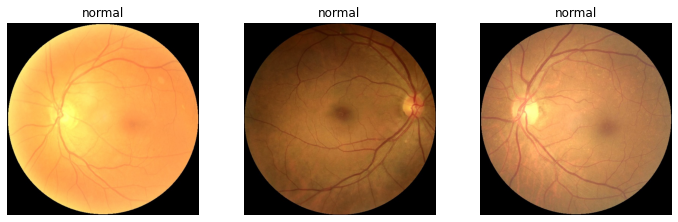

In [9]:
plot_image(2)

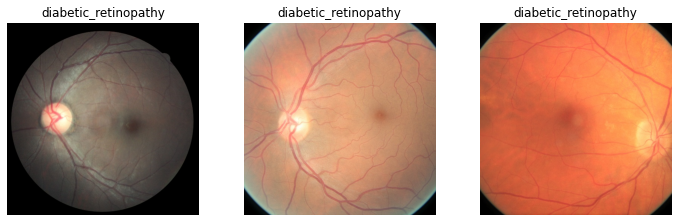

In [10]:
plot_image(3)

In [11]:
df['disease_type'] = df['disease_type'].map({0:'glaucoma',1:'cataract',2:'normal',3:'diabetic_retinopathy'})

In [12]:
df.disease_type.value_counts()

diabetic_retinopathy    1098
normal                  1074
glaucoma                1033
cataract                1007
Name: disease_type, dtype: int64

In [13]:
# shuffling the rows of a DataFrame df
df1=df.sample(frac=1).reset_index(drop=True)

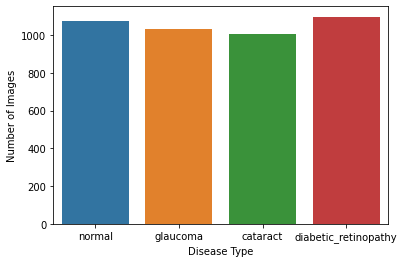

In [14]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Assuming 'df1' contains your DataFrame with 'disease_type' column
sns.countplot(x='disease_type', data=df1, palette=custom_palette)
plt.xlabel('Disease Type')
plt.ylabel('Number of Images')

# Save the plot as an image
plt.savefig('countplot.png')

plt.show()

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,BatchNormalization,MaxPooling2D,Conv2DTranspose,Activation
, Input,concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Add, DepthwiseConv2D,Flatten
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, RandomContrast, RandomRotation, RandomZoom, RandomFlip
from tensorflow.keras.utils import to_categorical, plot_model, image_dataset_from_directory

Data Training& Testing

In [16]:
from sklearn.model_selection import train_test_split

# Split your data into features (X) and labels (y)
X = df1['image']  # 'image' contains image data
y = df1['disease_type']  # 'disease_type' contains labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [18]:
# Data generators for training
train_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          subset = 'training')

Found 3370 validated image filenames belonging to 4 classes.


In [19]:
# Data generators for validation
valid_data=datagen.flow_from_dataframe(dataframe=df1,
                                      x_col='image',
                                      y_col = 'disease_type',
                                      target_size = (224,224),
                                      class_mode= 'categorical',
                                      batch_size = 32,
                                      shuffle = False,
                                      subset= 'validation')

Found 842 validated image filenames belonging to 4 classes.


In [20]:
# Check if class indices are consistent
if (train_data.class_indices == valid_data.class_indices):

    # Print that the class indices are consistent
    print("Class indices are consistent")

    # Save class indices as metadata in metadata.js
    class_indices = train_data.class_indices
    print(class_indices)
    js_code = f"const classIndices = {class_indices};\nexport default classIndices;"
    with open('metadata.js', 'w') as f:
        f.write(js_code)
else:
    print("Class indices are not consistent")

Class indices are consistent
{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}


Building The Model

In [21]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, RandomContrast, RandomRotation, RandomZoom, RandomFlip
from keras.models import Sequential

In [22]:
labels=[key for key in train_data.class_indices]
num_classes = len(disease_type)

In [23]:
from tensorflow.keras.applications.vgg19 import VGG19
image_size=224
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [24]:
for layer in vgg.layers:
    layer.trainable = False

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

model = Sequential()
model.add(vgg)
model.add(Flatten())


model.add(Dense(256,activation = "relu"))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(4,activation="softmax"))

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 26,449,220
Trainable params: 6,424,324
Non-trainable params: 20,024,896
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,save_freq=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',                # Filepath for saving the model
    monitor='val_accuracy',         # Use 'val_accuracy' for recent TensorFlow versions
    save_best_only=True,           # Only save the model if validation accuracy improves
    mode='max',                     # We're interested in maximizing validation accuracy
    verbose=1                       # Verbosity mode
)

# Fit the model including the checkpoint callback
his = model.fit(
    train_data,
    batch_size=20,
    epochs=20,
    validation_data=valid_data,
    callbacks=[checkpoint]          # Add the checkpoint callback here
)


Epoch 1/20
106/106 [==============================] - 1657s 16s/step - loss: 0.4521 - accuracy: 0.8323 - val_loss: 0.3600 - val_accuracy: 0.8670

Epoch 00001: val_accuracy improved from -inf to 0.86698, saving model to best_model.h5
Epoch 2/20
106/106 [==============================] - 1604s 15s/step - loss: 0.1902 - accuracy: 0.9326 - val_loss: 0.3238 - val_accuracy: 0.8729

Epoch 00002: val_accuracy improved from 0.86698 to 0.87292, saving model to best_model.h5
Epoch 3/20
106/106 [==============================] - 1583s 15s/step - loss: 0.1237 - accuracy: 0.9552 - val_loss: 0.3146 - val_accuracy: 0.8729

Epoch 00003: val_accuracy did not improve from 0.87292
Epoch 4/20
106/106 [==============================] - 1714s 16s/step - loss: 0.0797 - accuracy: 0.9742 - val_loss: 0.3475 - val_accuracy: 0.8741

Epoch 00004: val_accuracy improved from 0.87292 to 0.87411, saving model to best_model.h5
Epoch 5/20
106/106 [==============================] - 1937s 18s/step - loss: 0.0510 - accuracy

In [29]:
loss, accuracy = model.evaluate(valid_data)
print("Loss:", loss)
print("Accuracy:", accuracy)

27/27 [==============================] - 312s 12s/step - loss: 0.4639 - accuracy: 0.8848
Loss: 0.46390992403030396
Accuracy: 0.8847981095314026


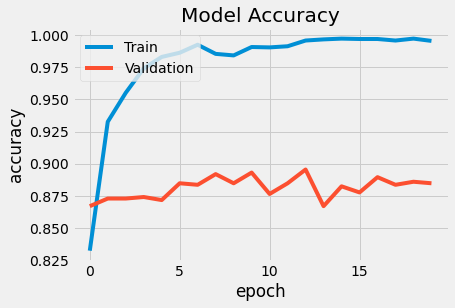

In [35]:
import matplotlib.pyplot as plt

# Assuming `his` is the history object returned by model.fit()
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



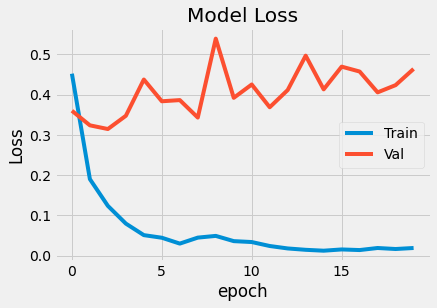

In [36]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [37]:
def tr_plot(tr_data, start_epoch):
    #Plot the loss and accuracy curve
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout

    plt.show()

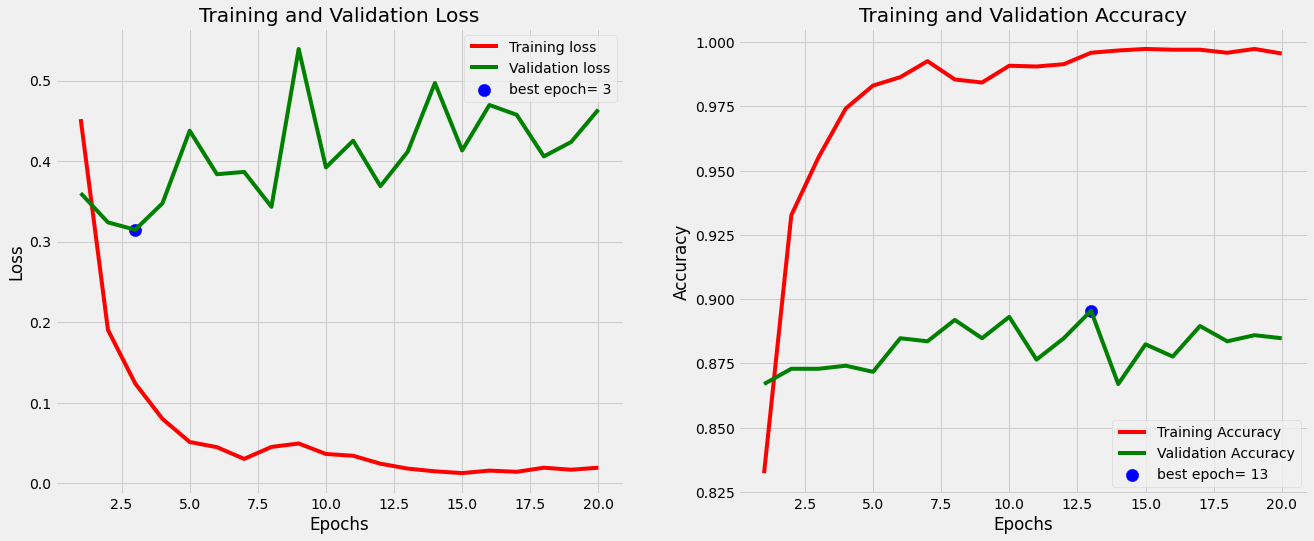

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the history
tr_plot(his,0)
plt.savefig('history.png')

Model Evaluation


In [46]:
y_test = valid_data.classes
y_pred = model.predict(valid_data)
y_pred = np.argmax(y_pred,axis=1)


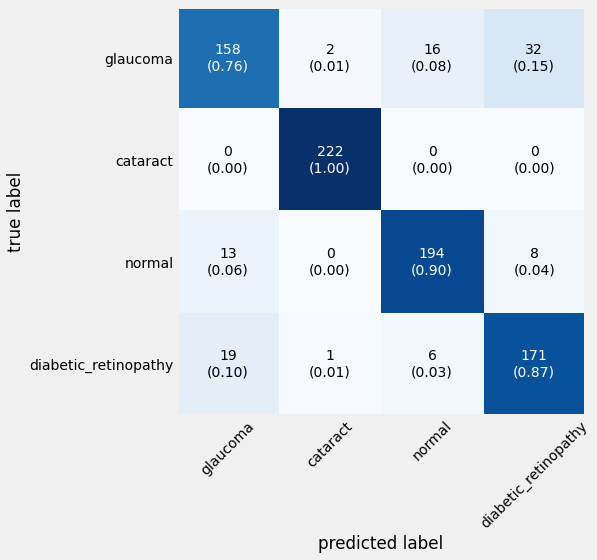

In [48]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["glaucoma", "cataract", "normal", "diabetic_retinopathy"],
                      show_normed = True);
plt.savefig("Predected & True Label")

In [49]:
print(classification_report(y_test,y_pred,target_names = labels))


                      precision    recall  f1-score   support

            cataract       0.83      0.76      0.79       208
diabetic_retinopathy       0.99      1.00      0.99       222
            glaucoma       0.90      0.90      0.90       215
              normal       0.81      0.87      0.84       197

            accuracy                           0.88       842
           macro avg       0.88      0.88      0.88       842
        weighted avg       0.88      0.88      0.88       842



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

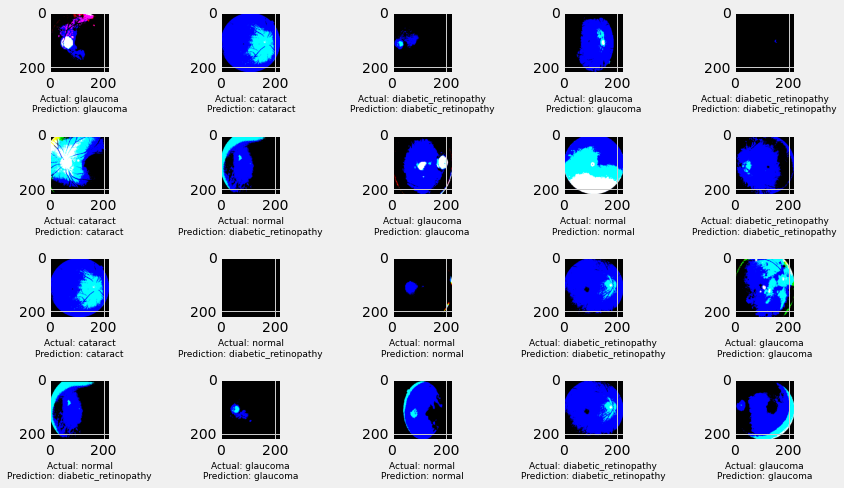

In [50]:
import random
import matplotlib.pyplot as plt

# Define the class labels
class_labels = ["glaucoma", "cataract", "normal", "diabetic_retinopathy"]

# Get a batch of data from the valid_data generator
images, labels = next(valid_data)

# Replace these variables with your actual data
y_pred = model.predict(images)  # Assuming you have a trained model

plt.figure(figsize=(12, 7))

for i in range(20):
    sample_index = random.randint(0, images.shape[0] - 1)
    image = images[sample_index]
    category_index = labels[sample_index].argmax()
    pred_category_index = y_pred[sample_index].argmax()

    label = class_labels[category_index]
    pred_label = class_labels[pred_category_index]

    plt.subplot(4, 5, i + 1)
    plt.imshow(image)

    # Change the font size for labels
    plt.xlabel("Actual: {}\nPrediction: {}".format(label, pred_label), fontsize=9)  # Change the fontsize as needed

plt.tight_layout()

# Save the plot as an image
plt.savefig('Model Eval.png')

plt.show()

In [51]:
model.save("Eye Disease Classification")

INFO:tensorflow:Assets written to: Eye Disease Classification\assets
